# Project 1 - Group 5
----

# Victorian housing price and rental cost data from 2010 to 2020
----

## Data cleaning & Converting Raw Data to DataFrame

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [1]:
# Dependencies and Setup
import matplotlib as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from numpy import array
import sklearn 
from sklearn import linear_model

In [2]:
# Pricing data files
house_price_path = "resources/Housing_Price.csv"
rental_cost_path = "resources/Rental_Cost_Cleaned_v2.csv"

# Read the housing price data
house_price_df = pd.read_csv(house_price_path)
house_price_df.head()

,Locality 0,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,Abbotsford,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1205000
1,ABERFELDIE,Aberfeldie,1046500,994000,852500,947500,1045000,1207500,1300000,1471000,1500000,1390000,1620000
2,AIREYS INLET,Aireys Inlet,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1125000
3,AIRPORT WEST,Airport West,575000,557500,495000,532000,575000,635000,742000,845000,845000,795000,807500
4,ALBANVALE,Albanvale,320000,317000,310000,313000,328000,345000,439000,526500,546000,512000,540000


In [3]:
# Read the rental cost data
rental_cost_df = pd.read_csv(rental_cost_path)
rental_cost_df.head()

,Unnamed: 0,Locality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Count 2020,Median 2020
0,NaN,locality,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Inner Melbourne,Albert Park-Middle Park-West St Kilda,958,$425,953,$425,977,$430,956,$440,...,852,$600,826,$585,802,$560,848,$550,832,$574
2,NaN,Armadale,592,$360,604,$360,624,$365,617,$370,...,753,$500,782,$500,709,$500,729,$495,743,$499
3,NaN,Carlton North,488,$423,485,$440,507,$450,515,$450,...,539,$585,536,$590,520,$590,547,$590,536,$589
4,NaN,Carlton-Parkville,"3,375",$340,"3,356",$340,"3,224",$340,"3,176",$340,...,"5,212",$404,"5,025",$400,"4,633",$400,"4,765",$395,4909,$400


In [4]:
#Delete extraneous column in house price ( 'Locality0' column)
del house_price_df["Locality 0"]
house_price_df.head()

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Abbotsford,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1205000
1,Aberfeldie,1046500,994000,852500,947500,1045000,1207500,1300000,1471000,1500000,1390000,1620000
2,Aireys Inlet,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1125000
3,Airport West,575000,557500,495000,532000,575000,635000,742000,845000,845000,795000,807500
4,Albanvale,320000,317000,310000,313000,328000,345000,439000,526500,546000,512000,540000


In [5]:
#Delete extraneous column in rental cost ( all 'unnamed'columns)
rental_cost_df=rental_cost_df.drop(rental_cost_df.columns[rental_cost_df.columns.str.contains('Unnamed',case=False)],axis=1)

#rental_cost_df=rental_cost_df.drop(rental_cost_df.index[0])
rental_cost_df=rental_cost_df.drop(labels=0,axis=0)

rental_cost_df.head()

,Locality,Count 2010,Median 2010,Count 2011,Median 2011,Count 2012,Median 2012,Count 2013,Median 2013,Count 2014,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
1,Albert Park-Middle Park-West St Kilda,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Armadale,609,$364,643,$383,606,$385,628,$395,671,...,662,$403,781,$445,916,$486,768,$481,743,$499
3,Carlton North,499,$441,529,$465,488,$495,515,$493,539,...,532,$526,491,$545,507,$567,496,$579,536,$589
4,Carlton-Parkville,3283,$340,3412,$340,3835,$340,3832,$347,4275,...,5206,$373,4690,$398,4422,$417,4474,$432,4909,$400
5,CBD-St Kilda Rd,5735,$415,6140,$428,6459,$441,7428,$444,8665,...,10013,$453,10656,$480,10210,$494,10771,$505,11687,$471


In [6]:
#Split column on delimter -
#rental_cost_df=rental_cost_df['Locality'].str.split('-',expand=True)
#rental_cost_df.head()
#df1=house_price_df
#df2=rental_cost_df

rental_cost_df1=rental_cost_df['Locality'].str.split('-', expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'Locality'}).join(rental_cost_df.drop('Locality', axis=1))
rental_cost_df1


,Locality,Count 2010,Median 2010,Count 2011,Median 2011,Count 2012,Median 2012,Count 2013,Median 2013,Count 2014,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
1,Albert Park,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
1,Middle Park,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
1,West St Kilda,961,$430,915,$445,973,$460,973,$462,1013,...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Armadale,609,$364,643,$383,606,$385,628,$395,671,...,662,$403,781,$445,916,$486,768,$481,743,$499
3,Carlton North,499,$441,529,$465,488,$495,515,$493,539,...,532,$526,491,$545,507,$567,496,$579,536,$589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Mornington,1341,$343,1284,$365,1371,$374,1479,$385,1447,...,1354,$425,1329,$450,1267,$464,1243,$485,1244,$495
117,Mt Martha,1341,$343,1284,$365,1371,$374,1479,$385,1447,...,1354,$425,1329,$450,1267,$464,1243,$485,1244,$495
118,Seaford,1509,$287,1704,$305,1847,$310,1938,$317,1906,...,1666,$344,1760,$353,1779,$366,1822,$370,1637,$378
118,Carrum Downs,1509,$287,1704,$305,1847,$310,1938,$317,1906,...,1666,$344,1760,$353,1779,$366,1822,$370,1637,$378


## Generate Melbourne Metropolitan List

In [7]:
#Filter House Price dataframe by Locality in Rental Cost dataframe
#df1=house_price_df
#df2=rental_cost_df

merge_df=pd.merge(house_price_df,rental_cost_df1,on="Locality")
merge_df



,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2016,Median 2016,Count 2017,Median 2017,Count 2018,Median 2018,Count 2019,Median 2019,Count 2020,Median 2020
0,Abbotsford,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,...,2139,$448,1939,$458,1860,$479,1945,$495,2006,$483
1,Albert Park,1167500,1390000,1265000,1360000,1503000,1700000,1775000,2150000,2070000,...,958,$515,896,$528,911,$563,876,$568,832,$574
2,Alphington,1000000,985000,1000000,1080000,1029000,1296500,1272500,1560000,1720000,...,703,$368,664,$383,703,$405,675,$444,648,$435
3,Altona,628500,575000,570000,575000,646500,718000,825000,950000,932500,...,4587,$371,4955,$385,4914,$398,5215,$400,5125,$400
4,Armadale,1800000,1615000,1500000,1675000,1750000,2172500,2367500,2300000,2341500,...,662,$403,781,$445,916,$486,768,$481,743,$499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,West Melbourne,816000,885000,720000,905000,916000,1005000,1104500,1350000,1370000,...,2749,$404,2838,$423,2776,$445,2762,$450,3402,$446
151,Whittlesea,345000,372500,365000,375000,375000,400000,448500,469500,577500,...,1249,$345,1308,$355,1229,$373,1368,$383,1603,$390
152,Williamstown,884000,900000,901000,920000,970000,1120000,1282500,1440000,1415000,...,585,$479,555,$485,571,$504,577,$519,520,$525
153,Windsor,900000,824000,818000,835000,956500,1094000,1505000,1420000,1422500,...,2659,$399,2500,$414,2426,$434,2439,$444,2429,$445


In [8]:
merge_df.to_csv ('/Users/rorosun/Desktop/Project_1 Group5/Final_Clean V2.csv', encoding='utf-8',index = False, header=True)

## Data analysis

### Q1 - How the housing price and rental cost change over the last decade in Victoria
* Using 2 different types of chart to illustrate (line graph & area chart)

### Q2 - The top ten suburbs in Victoria for housing prices rises and rental cost increase over the last decade. 
* Which area had the highest increase in median house price and rental cost? 
* Using 2 different types of chart to illustrate (bar chart & scatter plot)

### Q3 - The bottom ten suburbs in Victoria for housing prices fall and rental cost reduction over the last decade. 
* Which areas have been affected by median house price and rental cost in the last decade? 
* Using 2 different types of chart to illustrate (bar chart & scatter plot)

### Q4 - The suburbs had the highest and lowest number of leased properties. 
* Using the pie chart to illustrate (pie chart)

### Q5 - The correlation between housing price/ rental cost and suburb distribution
* Is there a positive or negative relation between population (Count) with rental cost and housing price? (Linear Regression, Scatter Plot)
* Using histogram or box plot to analyse the distribution of preferences

### Calculate capital gain for housing price and rental gain for rental price 2010 - 2020

In [9]:
#parse price columns and calculate columns of differences

merge_df["h20"] = merge_df["2020"].replace("[$,]", "", regex=True).astype(float)
merge_df["h10"] = merge_df["2010"].replace("[$,]", "", regex=True).astype(float)

merge_df["h1020"] = merge_df.h20 - merge_df.h10

merge_df["r20"] = merge_df["Median 2020"].replace("[$,]", "", regex=True).astype(float)
merge_df["r10"] = merge_df["Median 2010"].replace("[$,]", "", regex=True).astype(float)

merge_df["r1020"] = merge_df.r20  - merge_df.r10


In [10]:
housing_df = merge_df.sort_values(by="h1020", ascending=False)
housing_df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
144,Toorak,2590000,2617500,2775000,2875000,3391000,3987500,4900000,5100000,4700000,...,751,$500,708,$525,5200000.0,2590000.0,2610000.0,525.0,400.0,125.0
64,Flinders,760000,822000,710000,765000,808000,839000,1225000,1525000,1697500,...,826,$388,794,$405,2085000.0,760000.0,1325000.0,405.0,276.0,129.0
17,Brighton,1810000,1730000,1789500,1802500,1940000,2302500,2740000,3050000,2888000,...,985,$651,871,$685,3065000.0,1810000.0,1255000.0,685.0,550.0,135.0
94,Middle Park,1512500,1345000,1420500,1587500,2125000,2317000,2238500,2370000,2685000,...,876,$568,832,$574,2652500.0,1512500.0,1140000.0,574.0,430.0,144.0
119,Portsea,1387500,1625000,1398000,1195000,1305000,1800000,1701000,1925000,2180000,...,1938,$381,1878,$393,2515000.0,1387500.0,1127500.0,393.0,269.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Cranbourne,327000,325000,313000,315000,331500,360000,406000,510000,540000,...,4047,$386,4008,$390,520000.0,327000.0,193000.0,390.0,291.0,99.0
113,Pakenham,335000,340000,335000,335000,350000,367000,400000,470000,520000,...,2298,$353,2268,$354,526000.0,335000.0,191000.0,354.0,289.0,65.0
145,Tullamarine,440000,420000,393500,395000,412000,472500,530000,655000,665500,...,638,$386,650,$391,628000.0,440000.0,188000.0,391.0,300.0,91.0
19,Broadmeadows,384000,357000,320000,325000,345000,370000,416500,546000,575000,...,1731,$370,1610,$370,555000.0,384000.0,171000.0,370.0,303.0,67.0


### Highest and lowest change for Rental Price 2010 - 2020

In [11]:
rental_df = merge_df.sort_values(by="r1020", ascending=False)
rental_df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
18,Brighton East,1255000,1100000,1075000,1230000,1300000,1600000,1750000,1900000,1890000,...,427,$700,417,$737,1950000.0,1255000.0,695000.0,737.0,530.0,207.0
101,Mornington,512000,525000,501500,525000,558000,641000,745000,800000,850000,...,1243,$485,1244,$495,890000.0,512000.0,378000.0,495.0,343.0,152.0
28,Carlton North,930000,833000,940000,890500,1095000,1177500,1360000,1628000,1445000,...,496,$579,536,$589,1500000.0,930000.0,570000.0,589.0,441.0,148.0
106,Newport,655000,680000,630000,695000,740000,825000,950000,1080000,1059000,...,840,$488,778,$498,1100000.0,655000.0,445000.0,498.0,353.0,145.0
133,Spotswood,635000,602500,655000,680000,640000,795000,917500,1027500,1080000,...,840,$488,778,$498,1000000.0,635000.0,365000.0,498.0,353.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Parkville,1335000,1100000,1360000,1200000,1525000,1360500,2130000,2375000,2430000,...,4474,$432,4909,$400,1725000.0,1335000.0,390000.0,400.0,340.0,60.0
151,Whittlesea,345000,372500,365000,375000,375000,400000,448500,469500,577500,...,1368,$383,1603,$390,610000.0,345000.0,265000.0,390.0,333.0,57.0
56,Epping,380000,385000,365000,366500,386500,400000,455000,556000,600000,...,2117,$371,2049,$379,576500.0,380000.0,196500.0,379.0,325.0,54.0
95,Mill Park,420000,410000,405000,408000,430500,480000,560000,668500,657000,...,2117,$371,2049,$379,690000.0,420000.0,270000.0,379.0,325.0,54.0


## Line Charts and Linear Regression
----

In [12]:
housing_df

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2019,Median 2019,Count 2020,Median 2020,h20,h10,h1020,r20,r10,r1020
144,Toorak,2590000,2617500,2775000,2875000,3391000,3987500,4900000,5100000,4700000,...,751,$500,708,$525,5200000.0,2590000.0,2610000.0,525.0,400.0,125.0
64,Flinders,760000,822000,710000,765000,808000,839000,1225000,1525000,1697500,...,826,$388,794,$405,2085000.0,760000.0,1325000.0,405.0,276.0,129.0
17,Brighton,1810000,1730000,1789500,1802500,1940000,2302500,2740000,3050000,2888000,...,985,$651,871,$685,3065000.0,1810000.0,1255000.0,685.0,550.0,135.0
94,Middle Park,1512500,1345000,1420500,1587500,2125000,2317000,2238500,2370000,2685000,...,876,$568,832,$574,2652500.0,1512500.0,1140000.0,574.0,430.0,144.0
119,Portsea,1387500,1625000,1398000,1195000,1305000,1800000,1701000,1925000,2180000,...,1938,$381,1878,$393,2515000.0,1387500.0,1127500.0,393.0,269.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Cranbourne,327000,325000,313000,315000,331500,360000,406000,510000,540000,...,4047,$386,4008,$390,520000.0,327000.0,193000.0,390.0,291.0,99.0
113,Pakenham,335000,340000,335000,335000,350000,367000,400000,470000,520000,...,2298,$353,2268,$354,526000.0,335000.0,191000.0,354.0,289.0,65.0
145,Tullamarine,440000,420000,393500,395000,412000,472500,530000,655000,665500,...,638,$386,650,$391,628000.0,440000.0,188000.0,391.0,300.0,91.0
19,Broadmeadows,384000,357000,320000,325000,345000,370000,416500,546000,575000,...,1731,$370,1610,$370,555000.0,384000.0,171000.0,370.0,303.0,67.0


In [13]:
time=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]


In [14]:
final_data_path = "resources/Final_Clean V3.csv"

final_data = pd.read_csv(final_data_path)
final_data

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2013,Count 2014,Count 2015,Count 2016,Count 2017,Count 2018,Count 2019,Count 2020,Capital Gain,Rental Gain
0,Abbotsford,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,...,831,1552,1705,2139,1939,1860,1945,2006,469000,70
1,Albert Park,1167500,1390000,1265000,1360000,1503000,1700000,1775000,2150000,2070000,...,973,1013,930,958,896,911,876,832,722500,144
2,Alphington,1000000,985000,1000000,1080000,1029000,1296500,1272500,1560000,1720000,...,653,671,648,703,664,703,675,648,857500,122
3,Altona,628500,575000,570000,575000,646500,718000,825000,950000,932500,...,4243,4175,4293,4587,4955,4914,5215,5125,299000,79
4,Armadale,1800000,1615000,1500000,1675000,1750000,2172500,2367500,2300000,2341500,...,628,671,666,662,781,916,768,743,775000,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,West Melbourne,816000,885000,720000,905000,916000,1005000,1104500,1350000,1370000,...,2023,2145,2475,2749,2838,2776,2762,3402,399000,71
151,Whittlesea,345000,372500,365000,375000,375000,400000,448500,469500,577500,...,847,888,1005,1249,1308,1229,1368,1603,265000,57
152,Williamstown,884000,900000,901000,920000,970000,1120000,1282500,1440000,1415000,...,548,562,568,585,555,571,577,520,486000,141
153,Windsor,900000,824000,818000,835000,956500,1094000,1505000,1420000,1422500,...,2511,2665,2659,2659,2500,2426,2439,2429,450000,71


In [15]:
housing = final_data.sort_values(by="Capital Gain", ascending=False)
housing

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2013,Count 2014,Count 2015,Count 2016,Count 2017,Count 2018,Count 2019,Count 2020,Capital Gain,Rental Gain
144,Toorak,2590000,2617500,2775000,2875000,3391000,3987500,4900000,5100000,4700000,...,805,813,769,796,779,772,751,708,2610000,125
64,Flinders,760000,822000,710000,765000,808000,839000,1225000,1525000,1697500,...,1123,1117,1071,955,900,806,826,794,1325000,129
17,Brighton,1810000,1730000,1789500,1802500,1940000,2302500,2740000,3050000,2888000,...,809,934,911,955,963,933,985,871,1255000,135
94,Middle Park,1512500,1345000,1420500,1587500,2125000,2317000,2238500,2370000,2685000,...,973,1013,930,958,896,911,876,832,1140000,144
119,Portsea,1387500,1625000,1398000,1195000,1305000,1800000,1701000,1925000,2180000,...,1941,1933,1937,1906,1910,1987,1938,1878,1127500,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Cranbourne,327000,325000,313000,315000,331500,360000,406000,510000,540000,...,1787,1974,2410,2496,3031,3574,4047,4008,193000,99
113,Pakenham,335000,340000,335000,335000,350000,367000,400000,470000,520000,...,2318,2217,2219,2098,2216,2230,2298,2268,191000,65
145,Tullamarine,440000,420000,393500,395000,412000,472500,530000,655000,665500,...,642,610,655,586,585,619,638,650,188000,91
19,Broadmeadows,384000,357000,320000,325000,345000,370000,416500,546000,575000,...,1433,1380,1423,1652,1738,1750,1731,1610,171000,67


In [16]:
toorak1 = housing.iloc[:1]
toorak1=toorak1.iloc[:,1:12]

toorak2 = housing.iloc[:1]
toorak2=toorak2.iloc[:,12:23]

flinders1 = housing.iloc[[1]]
flinders1=flinders1.iloc[:,1:12]

flinders2 = housing.iloc[[1]]
flinders2=flinders2.iloc[:,12:23]

brighton1 = housing.iloc[[2]]
brighton1=brighton1.iloc[:,1:12]

brighton2 = housing.iloc[[2]]
brighton2=brighton2.iloc[:,12:23]

middle_park1 = housing.iloc[[3]]
middle_park1=middle_park1.iloc[:,1:12]

middle_park2 = housing.iloc[[3]]
middle_park2=middle_park2.iloc[:,12:23]

portsea1 = housing.iloc[[4]]
portsea1=portsea1.iloc[:,1:12]

portsea2 = housing.iloc[[4]]
portsea2=portsea2.iloc[:,12:23]

In [17]:
rental = final_data.sort_values(by="Rental Gain", ascending=False)
rental

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Count 2013,Count 2014,Count 2015,Count 2016,Count 2017,Count 2018,Count 2019,Count 2020,Capital Gain,Rental Gain
18,Brighton East,1255000,1100000,1075000,1230000,1300000,1600000,1750000,1900000,1890000,...,433,407,387,428,430,415,427,417,695000,207
101,Mornington,512000,525000,501500,525000,558000,641000,745000,800000,850000,...,1479,1447,1355,1354,1329,1267,1243,1244,378000,152
28,Carlton North,930000,833000,940000,890500,1095000,1177500,1360000,1628000,1445000,...,515,539,542,532,491,507,496,536,570000,148
106,Newport,655000,680000,630000,695000,740000,825000,950000,1080000,1059000,...,733,758,762,798,815,808,840,778,445000,145
133,Spotswood,635000,602500,655000,680000,640000,795000,917500,1027500,1080000,...,733,758,762,798,815,808,840,778,365000,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Parkville,1335000,1100000,1360000,1200000,1525000,1360500,2130000,2375000,2430000,...,3832,4275,4871,5206,4690,4422,4474,4909,390000,60
151,Whittlesea,345000,372500,365000,375000,375000,400000,448500,469500,577500,...,847,888,1005,1249,1308,1229,1368,1603,265000,57
56,Epping,380000,385000,365000,366500,386500,400000,455000,556000,600000,...,2163,2181,2179,2237,2204,2128,2117,2049,196500,54
95,Mill Park,420000,410000,405000,408000,430500,480000,560000,668500,657000,...,2163,2181,2179,2237,2204,2128,2117,2049,270000,54


In [18]:
brighton_east2 = rental.iloc[:1]
brighton_east2=brighton_east2.iloc[:,12:23]

brighton_east3 = rental.iloc[:1]
brighton_east3=brighton_east3.iloc[:,23:34]

brighton_east1 = rental.iloc[:1]
brighton_east1=brighton_east1.iloc[:,1:12]

mornington2 = rental.iloc[[1]]
mornington2=mornington2.iloc[:,12:23]

mornington3 = rental.iloc[[1]]
mornington3=mornington3.iloc[:,23:34]

mornington1 = rental.iloc[[1]]
mornington1=mornington1.iloc[:,1:12]

carlton_north2 = rental.iloc[[2]]
carlton_north2=carlton_north2.iloc[:,12:23]

carlton_north3 = rental.iloc[[2]]
carlton_north3=carlton_north3.iloc[:,23:34]

carlton_north1 = rental.iloc[[2]]
carlton_north1=carlton_north1.iloc[:,1:12]

newport2 = rental.iloc[[3]]
newport2=newport2.iloc[:,12:23]

newport3 = rental.iloc[[3]]
newport3=newport3.iloc[:,23:34]

newport1 = rental.iloc[[3]]
newport1=newport1.iloc[:,1:12]

spotswood2 = rental.iloc[[4]]
spotswood2=spotswood2.iloc[:,12:23]

spotswood3 = rental.iloc[[4]]
spotswood3=spotswood3.iloc[:,23:34]

spotswood1 = rental.iloc[[4]]
spotswood1=spotswood1.iloc[:,1:12]

## The correlation between Housing Price and Rental Price
Top 5 suburbs with the highest Capital Gain & top 5 suburbs with the highest Rental Gain.
----

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.03x+342.56
The r-squared correlation coefficient for this line is 0.86


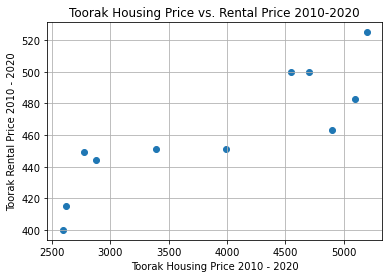

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = toorak1/1000
y_axis = toorak2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Toorak Housing Price 2010 - 2020')
plt.ylabel('Toorak Rental Price 2010 - 2020')
plt.title("Toorak Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Toorak Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.08x+237.46
The r-squared correlation coefficient for this line is 0.96


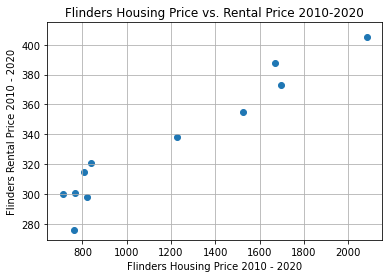

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = flinders1/1000
y_axis = flinders2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Flinders Housing Price 2010 - 2020')
plt.ylabel('Flinders Rental Price 2010 - 2020')
plt.title("Flinders Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Flinders Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.05x+510.34
The r-squared correlation coefficient for this line is 0.66


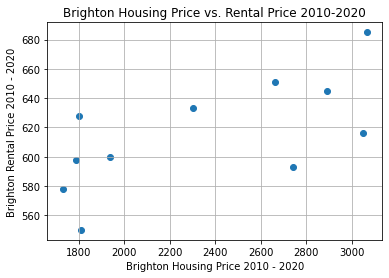

<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = brighton1/1000
y_axis = brighton2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Brighton Housing Price 2010 - 2020')
plt.ylabel('Brighton Rental Price 2010 - 2020')
plt.title("Brighton Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Brighton Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.00x+311.80
The r-squared correlation coefficient for this line is 0.94


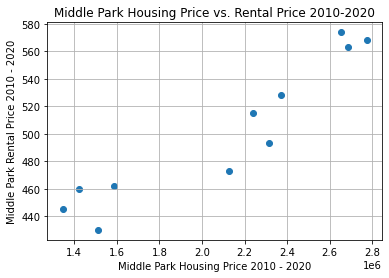

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = middle_park1
y_axis = middle_park2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Middle Park Housing Price 2010 - 2020')
plt.ylabel('Middle Park Rental Price 2010 - 2020')
plt.title("Middle Park Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Middle Park Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.00x+172.46
The r-squared correlation coefficient for this line is 0.87


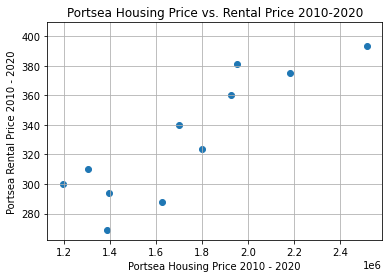

<Figure size 432x288 with 0 Axes>

In [23]:
x_axis = portsea1
y_axis = portsea2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Portsea Housing Price 2010 - 2020')
plt.ylabel('Portsea Rental Price 2010 - 2020')
plt.title("Portsea Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Portsea Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.15x+392.90
The r-squared correlation coefficient for this line is 0.82


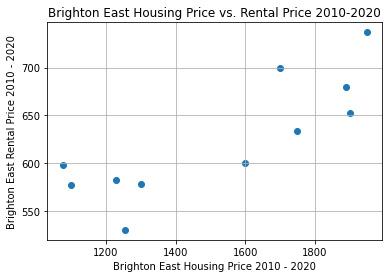

<Figure size 432x288 with 0 Axes>

In [24]:
x_axis = brighton_east1/1000
y_axis = brighton_east2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Brighton East Housing Price 2010 - 2020')
plt.ylabel('Brighton East Rental Price 2010 - 2020')
plt.title("Brighton East Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Brighton East Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.32x+203.59
The r-squared correlation coefficient for this line is 0.96


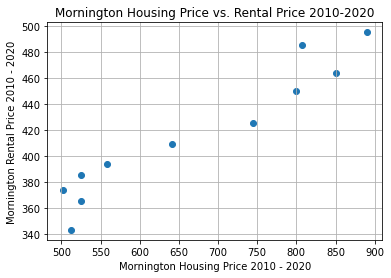

<Figure size 432x288 with 0 Axes>

In [25]:
x_axis = mornington1/1000
y_axis = mornington2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mornington Housing Price 2010 - 2020')
plt.ylabel('Mornington Rental Price 2010 - 2020')
plt.title("Mornington Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Mornington Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.14x+352.29
The r-squared correlation coefficient for this line is 0.88


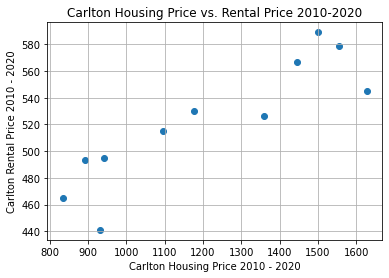

<Figure size 432x288 with 0 Axes>

In [26]:
x_axis = carlton_north1/1000
y_axis = carlton_north2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Carlton Housing Price 2010 - 2020')
plt.ylabel('Carlton Rental Price 2010 - 2020')
plt.title("Carlton Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Carlton North Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.25x+216.14
The r-squared correlation coefficient for this line is 0.95


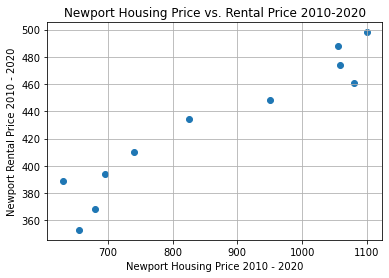

<Figure size 432x288 with 0 Axes>

In [27]:
x_axis = newport1/1000
y_axis = newport2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Newport Housing Price 2010 - 2020')
plt.ylabel('Newport Rental Price 2010 - 2020')
plt.title("Newport Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Newport Housing Price vs. Rental Price Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.25x+225.36
The r-squared correlation coefficient for this line is 0.92


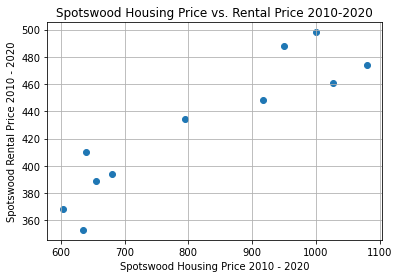

<Figure size 432x288 with 0 Axes>

In [28]:
x_axis = spotswood1/1000
y_axis = spotswood2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Spotswood Housing Price 2010 - 2020')
plt.ylabel('Spotswood Rental Price 2010 - 2020')
plt.title("Spotswood Housing Price vs. Rental Price 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Spotswood Housing Price vs. Rental Price Linear Regression.png")

## The correlation between Rental Price and Count/Populatiom
----

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.36x+176.82
The r-squared correlation coefficient for this line is 0.63


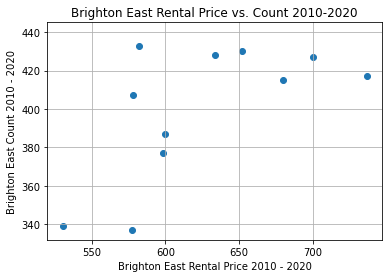

<Figure size 432x288 with 0 Axes>

In [29]:
x_axis = brighton_east2
y_axis = brighton_east3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Brighton East Rental Price 2010 - 2020')
plt.ylabel('Brighton East Count 2010 - 2020')
plt.title("Brighton East Rental Price vs. Count 2010-2020")


#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Brighton East Rental Price vs. Count Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=-0.91x+1715.39
The r-squared correlation coefficient for this line is -0.60


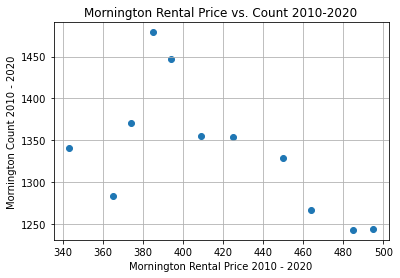

<Figure size 432x288 with 0 Axes>

In [30]:
x_axis = mornington2
y_axis = mornington3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mornington Rental Price 2010 - 2020')
plt.ylabel('Mornington Count 2010 - 2020')
plt.title("Mornington Rental Price vs. Count 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Mornington Rental Price vs. Count Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=0.03x+497.79
The r-squared correlation coefficient for this line is 0.08


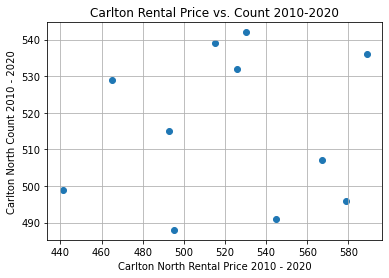

<Figure size 432x288 with 0 Axes>

In [31]:
x_axis = carlton_north2
y_axis = carlton_north3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Carlton North Rental Price 2010 - 2020')
plt.ylabel('Carlton North Count 2010 - 2020')
plt.title("Carlton Rental Price vs. Count 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Carlton North Rental Price vs. Count Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=1.00x+332.21
The r-squared correlation coefficient for this line is 0.91


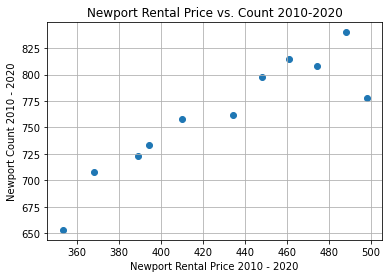

<Figure size 432x288 with 0 Axes>

In [32]:
x_axis = newport2
y_axis = newport3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Newport Rental Price 2010 - 2020')
plt.ylabel('Newport Count 2010 - 2020')
plt.title("Newport Rental Price vs. Count 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Newport Rental Price vs. Count Linear Regression.png")

/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rorosun/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The equation of the best-fit linear regression line for this chart is y=1.00x+332.21
The r-squared correlation coefficient for this line is 0.91


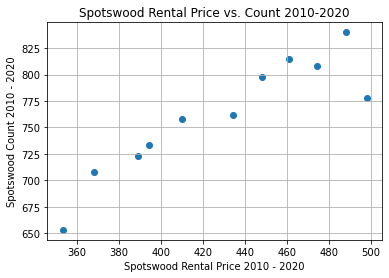

<Figure size 432x288 with 0 Axes>

In [33]:
x_axis = spotswood2
y_axis = spotswood3
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Spotswood Rental Price 2010 - 2020')
plt.ylabel('Spotswood Count 2010 - 2020')
plt.title("Spotswood Rental Price vs. Count 2010-2020")

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("Spotswood Rental Price vs. Count Linear Regression.png")

## Boxplots
----

In [34]:
final_housing_path = "resources/Final_Housing.csv"

final_housing = pd.read_csv(final_housing_path)
final_housing

,Year,Abbotsford,Albert Park,Alphington,Altona,Armadale,Ascot Vale,Ashburton,Aspendale,Avondale Heights,...,Tullamarine,Vermont,Wantirna,Werribee,West Footscray,West Melbourne,Whittlesea,Williamstown,Windsor,Yarraville
0,2010,736000,1167500,1000000,628500,1800000,750000,985000,637500,576000,...,440000,610000,545000,308500,558500,816000,345000,884000,900000,647000
1,2011,730000,1390000,985000,575000,1615000,735000,890000,630000,538000,...,420000,552500,528000,315000,525000,885000,372500,900000,824000,607000
2,2012,714000,1265000,1000000,570000,1500000,701500,870000,610000,536000,...,393500,571000,515000,300000,532500,720000,365000,901000,818000,613000
3,2013,792500,1360000,1080000,575000,1675000,735000,1000000,620000,532500,...,395000,610000,576000,309000,553000,905000,375000,920000,835000,696000
4,2014,862500,1503000,1029000,646500,1750000,810000,1200000,690000,560000,...,412000,725000,667500,315000,637500,916000,375000,970000,956500,710000
5,2015,925000,1700000,1296500,718000,2172500,885000,1435000,795500,650000,...,472500,855000,764000,335000,697000,1005000,400000,1120000,1094000,810000
6,2016,1187500,1775000,1272500,825000,2367500,1010000,1567500,891000,750000,...,530000,900000,801000,403000,798000,1104500,448500,1282500,1505000,900500
7,2017,1280000,2150000,1560000,950000,2300000,1180000,1812500,1125000,845500,...,655000,1065000,953000,470000,887500,1350000,469500,1440000,1420000,1000000
8,2018,1192500,2070000,1720000,932500,2341500,1197500,1712500,980000,830000,...,665500,980000,915000,510000,875000,1370000,577500,1415000,1422500,1045000
9,2019,1050000,1980000,1592500,890000,2495000,1088500,1641500,994000,810000,...,612000,937000,860000,505000,785000,1017500,580000,1350000,1350000,974000


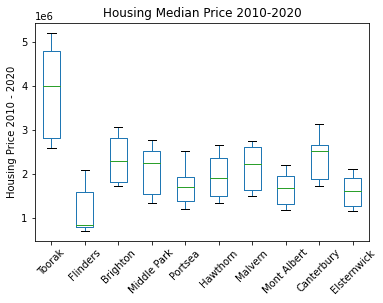

In [35]:
boxplot = final_housing.boxplot(column=['Toorak', 'Flinders', 'Brighton','Middle Park','Portsea','Hawthorn','Malvern','Mont Albert','Canterbury','Elsternwick']) 
plt.xticks(rotation=45)
plt.ylabel('Housing Price 2010 - 2020')
plt.title("Housing Median Price 2010-2020")
plt.grid(False)

<AxesSubplot:>

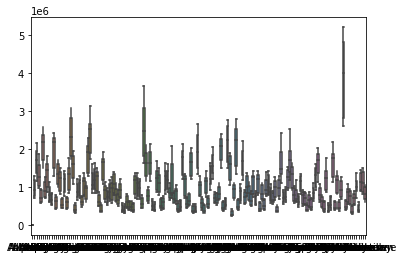

In [36]:
sns.boxplot(data=final_housing)

In [37]:
final_rental_path = "resources/Final_Rental.csv"

final_rental = pd.read_csv(final_rental_path)
final_rental

,Year,Abbotsford,Albert Park,Alphington,Altona,Armadale,Ascot Vale,Ashburton,Aspendale,Avondale Heights,...,Tullamarine,Vermont,Wantirna,Werribee,West Footscray,West Melbourne,Whittlesea,Williamstown,Windsor,Yarraville
0,2010,413,430,313,321,364,355,358,328,335,...,300,362,348,278,300,375,333,384,374,348
1,2011,432,445,323,330,383,376,366,350,348,...,313,379,359,287,309,400,350,424,390,350
2,2012,450,460,329,330,385,389,391,355,350,...,323,384,366,290,320,384,335,431,395,368
3,2013,460,462,343,339,395,386,400,357,364,...,320,387,373,290,320,393,330,450,383,379
4,2014,439,473,349,350,394,385,398,369,370,...,330,398,380,299,328,395,330,447,389,398
5,2015,435,493,345,357,400,393,405,379,374,...,335,410,395,310,335,398,339,453,400,411
6,2016,448,515,368,371,403,400,426,393,386,...,344,420,400,325,355,404,345,479,399,425
7,2017,458,528,383,385,445,418,441,408,398,...,360,431,420,341,366,423,355,485,414,450
8,2018,479,563,405,398,486,438,458,428,414,...,378,450,435,360,380,445,373,504,434,464
9,2019,495,568,444,400,481,445,468,440,420,...,386,455,441,370,395,450,383,519,444,485


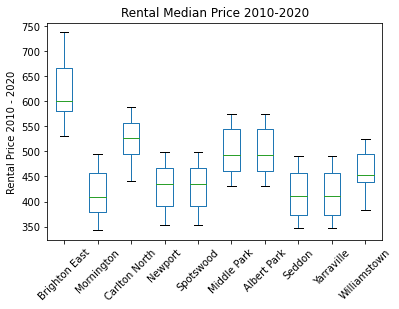

In [38]:
boxplot = final_rental.boxplot(column=['Brighton East', 'Mornington', 'Carlton North','Newport','Spotswood','Middle Park','Albert Park','Seddon','Yarraville','Williamstown']) 
plt.xticks(rotation=45)
plt.ylabel('Rental Price 2010 - 2020')
plt.title("Rental Median Price 2010-2020")
plt.grid(False)

In [39]:
final_count_path = "resources/Final_Count.csv"

final_count = pd.read_csv(final_count_path)
final_count

,Year,Abbotsford,Albert Park,Alphington,Altona,Armadale,Ascot Vale,Ashburton,Aspendale,Avondale Heights,...,Tullamarine,Vermont,Wantirna,Werribee,West Footscray,West Melbourne,Whittlesea,Williamstown,Windsor,Yarraville
0,2010,695,961,551,3082,609,1199,923,1392,960,...,503,668,687,4387,956,1519,282,503,1825,1067
1,2011,774,915,567,3639,643,1242,994,1470,1019,...,564,741,722,4778,1145,1753,403,492,1914,1113
2,2012,721,973,644,4305,606,1346,999,1561,1036,...,640,784,820,5587,1226,2013,630,509,1955,1125
3,2013,831,973,653,4243,628,1339,1011,1506,1248,...,642,837,816,4948,1358,2023,847,548,2511,1149
4,2014,1552,1013,671,4175,671,1389,1215,1465,1310,...,610,831,818,4623,1363,2145,888,562,2665,1185
5,2015,1705,930,648,4293,666,1470,1173,1436,1408,...,655,858,940,4854,1439,2475,1005,568,2659,1229
6,2016,2139,958,703,4587,662,1577,1213,1468,1457,...,586,892,1123,4921,1499,2749,1249,585,2659,1247
7,2017,1939,896,664,4955,781,1597,1335,1489,1475,...,585,962,1156,5453,1448,2838,1308,555,2500,1203
8,2018,1860,911,703,4914,916,1537,1421,1451,1437,...,619,951,1172,6357,1399,2776,1229,571,2426,1277
9,2019,1945,876,675,5215,768,1833,1378,1497,1541,...,638,1008,1208,7150,1401,2762,1368,577,2439,1269


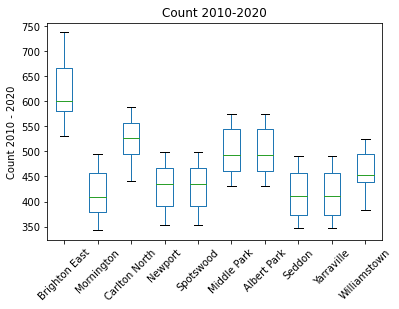

In [40]:
boxplot = final_rental.boxplot(column=['Brighton East', 'Mornington', 'Carlton North','Newport','Spotswood','Middle Park','Albert Park','Seddon','Yarraville','Williamstown']) 
plt.xticks(rotation=45)
plt.ylabel('Count 2010 - 2020')
plt.title("Count 2010-2020")
plt.grid(False)